In [24]:
import torch

In [25]:

inputs= torch.tensor(
    [[0.43,0.13,.89], #your
     [.55,.87,.66], #attention
     [.57,.85,.64], #starts
     [.22,.58,.33], #from
     [.77,.25,.10], #this
     [.05,.80,.55] #step
     ]
)

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy

In [27]:
words= ["your","Attention","Starts","from","this","Step"]

In [28]:
x_coords= inputs[:,0].numpy()
y_coords= inputs[:,1].numpy()
z_coords= inputs[:,2].numpy()

x_coords,y_coords,z_coords

(array([0.43, 0.55, 0.57, 0.22, 0.77, 0.05], dtype=float32),
 array([0.13, 0.87, 0.85, 0.58, 0.25, 0.8 ], dtype=float32),
 array([0.89, 0.66, 0.64, 0.33, 0.1 , 0.55], dtype=float32))

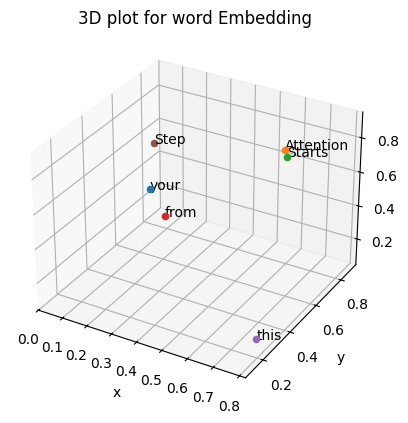

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
for x, y , z ,word in zip(x_coords,y_coords,z_coords,words):
    # print(f"{word}: {x},{y},{z}"
    ax.scatter(x,y,z)
    ax.text(x,y,z,s=word)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("3D plot for word Embedding")
plt.show()

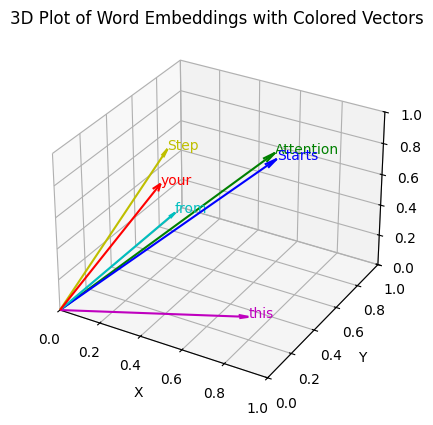

In [30]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [31]:
#calautaing attention score with respect to query
query=inputs[1]
attention_score_2=torch.empty(inputs.shape[0])
for i , j in enumerate(inputs):
    attention_score_2[i]=torch.dot(query,j) # dot product (transpose not necessary here since they are 1-dim vectors)

attention_score_2

tensor([0.9370, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

Normalzing

In [32]:
attn_weights_2_tmp = attention_score_2 / attention_score_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1432, 0.2284, 0.2254, 0.1289, 0.1080, 0.1660])
Sum: tensor(1.0000)


Normalizing using Softmax: naive one as we are not eadling with the overflow issue

In [33]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attention_score_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1365, 0.2385, 0.2338, 0.1243, 0.1084, 0.1585])
Sum: tensor(1.0000)


In [34]:
torch.exp(inputs).sum(dim=0)

tensor([ 9.4959, 11.1610, 10.4958])

In [35]:
torch.exp(inputs)

tensor([[1.5373, 1.1388, 2.4351],
        [1.7333, 2.3869, 1.9348],
        [1.7683, 2.3396, 1.8965],
        [1.2461, 1.7860, 1.3910],
        [2.1598, 1.2840, 1.1052],
        [1.0513, 2.2255, 1.7333]])

Sofmax using python that is e^x-max

In [36]:
attn_weights_2 = torch.softmax(attn_weights_2_naive, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1615, 0.1788, 0.1780, 0.1595, 0.1570, 0.1651])
Sum: tensor(1.0000)


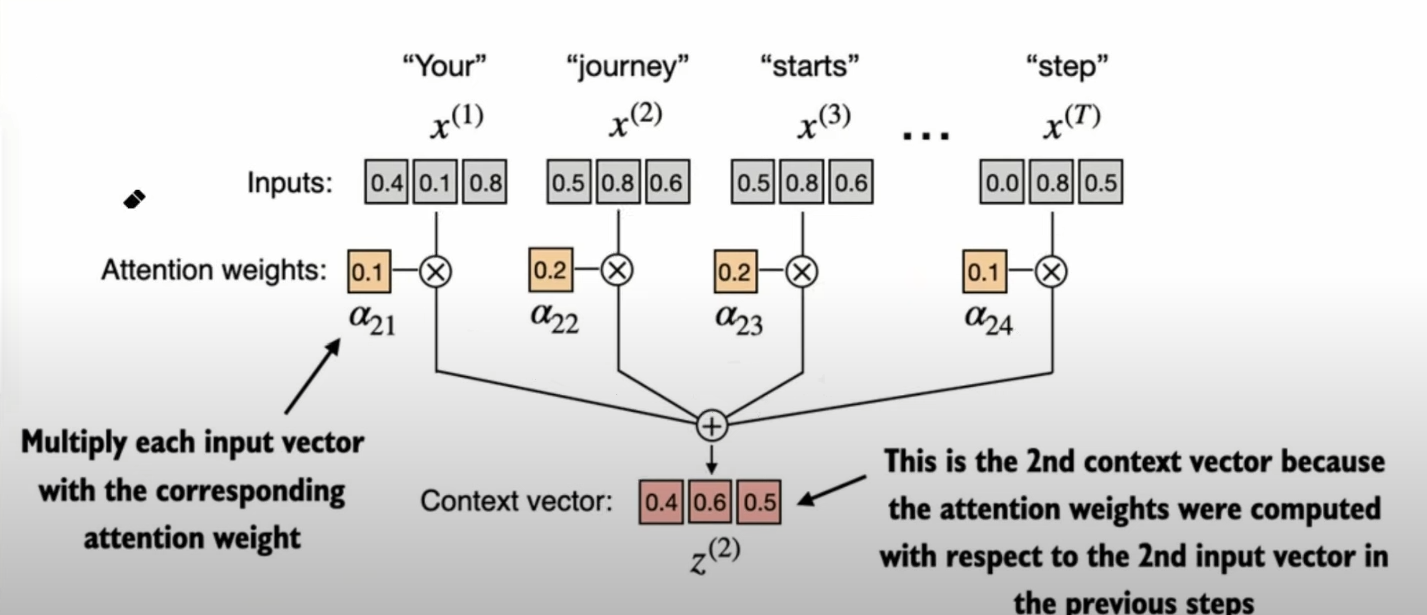

Generating Context vector

In [37]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4335, 0.5918, 0.5348])


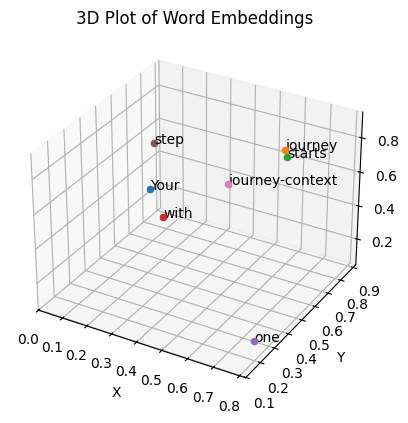

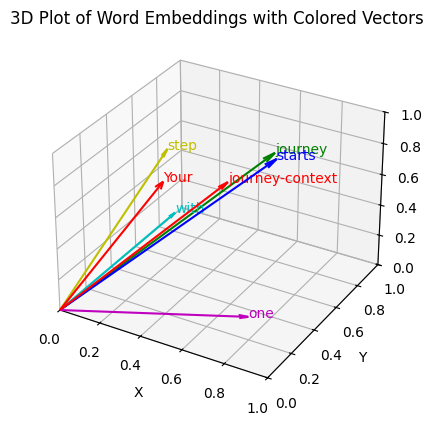

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

Now doing the same for the others as we need it for each query with each input

In [42]:
attn_scores = torch.empty(inputs.shape[0], inputs.shape[0]) # Change the shape to (6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
      attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


Above code is not computationaly efficient

In [43]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


Hence the matrix Mulitplication

In [44]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


Applying softmax

In [47]:
attn_scores.shape

torch.Size([7, 7])

In [48]:
attn_weights = torch.softmax(attn_scores, dim=-1) #this will be the columns in our case : so we will sum up all the columns ina rowthat is dim=1
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In [53]:
row_2_sum = sum([0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1460])
print("Row 1 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=1))

Row 1 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [54]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4420, 0.6016, 0.5774],
        [0.4419, 0.6515, 0.5683],
        [0.4429, 0.6499, 0.5673],
        [0.4321, 0.6330, 0.5536],
        [0.4635, 0.5997, 0.5326],
        [0.4213, 0.6505, 0.5651],
        [0.4397, 0.6372, 0.5635]])


In [55]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4335, 0.5918, 0.5348])


## here's one issue with simple non trainable attention

Sentence: "The cat sat on the mat because it was warm."

Suppose our query is "warm."

Without Trainable Weights: If we only use the dot product between the query "warm" and each word's embedding, we might find that "warm" is most similar to itself, and maybe somewhat related to "mat" (if our embeddings capture that mats can be warm). Words like "The," "cat," and "sat" might have low similarity scores because they're not semantically related to "warm."

With Trainable Weights: With trainable weights, the model can learn that "warm" should pay more attention to "mat" even if "mat" isn't semantically similar to "warm" in a traditional embedding space. The model learns that "warm" often follows "mat" in contexts like this one, capturing the long-range dependency.